<a href="https://www.kaggle.com/code/odins0n/playground-s-3-e-3-eda-modelling?scriptVersionId=116596837" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**Created by Sanskar Hasija**

**[PLAYGROUND S-3,E-3] 📊EDA + MODELLING📈**

**17 January 2023**


# <center> [Playground S-3,E-3] 📊EDA + Modelling📈 </center>
## <center>If you find this notebook useful, support with an upvote👍</center>

# Table of Contents
<a id="toc"></a>
- [1. Introduction](#1)
- [2. Imports](#2)
- [3. Data Loading and Preperation](#3)
    - [3.1 Exploring Train Data](#3.1)
    - [3.2 Exploring Test Data](#3.2)
    - [3.3 Submission File](#3.3)
- [4. EDA](#4)
    - [4.1 Overview of Data](#4.1)
    - [4.2 Null Value Distribution](#4.7)
    - [4.3 Continuos and Categorical Data Distribution](#4.2)
    - [4.4 Feature Distribution of Continous Features](#4.3)
    - [4.5 Feature Distribution of Categorical Features](#4.4)
    - [4.6 Target Distribution ](#4.5)
- [5. Data Cleaning and Processing ](#5)   
- [6. Modelling](#6)
    - [6.1 LGBM Classifier](#6.1)
    - [6.2 Catboost Classifier](#6.2)
    - [6.3 XGBoost Classifier](#6.3)
- [7. Submission](#7)   

<a id="1"></a>
# Introduction

**The task of this compeition is to predict the probability for the target variable `Attrition` using synthetic data from a Employee Attrition dataaset. The dataset used for this compeition is derived from this [Orginal Dataset](https://www.kaggle.com/datasets/pavansubhasht/ibm-hr-analytics-attrition-dataset).**

**Submissions are evaluated based on  <u>Area under the ROC curve.</u>**

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="2"></a>
# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px



from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split



from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier


from matplotlib import ticker
import time
import warnings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)
warnings.filterwarnings('ignore')


RANDOM_STATE = 12 
FOLDS = 5

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="3"></a>
# Data Loading and Preperation

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s3e3/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e3/test.csv")
submission = pd.read_csv("/kaggle/input/playground-series-s3e3/sample_submission.csv")

<a id="3.1"></a>
## Exploring Train Data

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Train Data:</u></b><br>

* <i>There are total of <b><u>35</u></b> columns : <b><u>8</u></b> continous , <b><u>25</u></b> categorical <b><u>1</u></b> row_id and <b><u>1</u></b> target column</i><br>
* <i> There are total of <b><u>1677</u></b> rows in train dataset.</i><br>
* <i> <b><u>Attrition</u></b> is the target variable which is only available in the <b><u>train</u></b> dataset..</i><br>
* <i> Train dataset contain <b><u>58695</u></b> observation with <b><u>0</u></b>  missing / null values.</i><br>
* <i> No <b><u>NULL</u></b> Values 🙂 </i><br>
    
</div>

### Quick view of Train Data

Below is the first 5 rows of train dataset:

In [3]:
train.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0,36,Travel_Frequently,599,Research & Development,24,3,Medical,1,4,Male,42,3,1,Laboratory Technician,4,Married,2596,5099,1,Y,Yes,13,3,2,80,1,10,2,3,10,0,7,8,0
1,1,35,Travel_Rarely,921,Sales,8,3,Other,1,1,Male,46,3,1,Sales Representative,1,Married,2899,10778,1,Y,No,17,3,4,80,1,4,3,3,4,2,0,3,0
2,2,32,Travel_Rarely,718,Sales,26,3,Marketing,1,3,Male,80,3,2,Sales Executive,4,Divorced,4627,16495,0,Y,No,17,3,4,80,2,4,3,3,3,2,1,2,0
3,3,38,Travel_Rarely,1488,Research & Development,2,3,Medical,1,3,Female,40,3,2,Healthcare Representative,1,Married,5347,13384,3,Y,No,14,3,3,80,0,15,1,1,6,0,0,2,0
4,4,50,Travel_Rarely,1017,Research & Development,5,4,Medical,1,2,Female,37,3,5,Manager,1,Single,19033,19805,1,Y,Yes,13,3,3,80,0,31,0,3,31,14,4,10,1


In [4]:
print(f'\033[92mNumber of rows in train data: {train.shape[0]}')
print(f'\033[94mNumber of columns in train data: {train.shape[1]}')
print(f'\033[91mNumber of values in train data: {train.count().sum()}')
print(f'\033[91mNumber missing values in train data: {sum(train.isna().sum())}')

Number of rows in train data: 1677
Number of columns in train data: 35
Number of values in train data: 58695
Number missing values in train data: 0


### Basic statistics of training data

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [5]:
train.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000,1677.000000
mean,838.000000,36.036971,892.749553,8.683959,2.937984,1.000000,2.757901,67.798450,2.782349,1.998807,2.791890,6196.049493,14770.048301,2.574836,14.903399,3.127609,2.751342,80.000000,0.721527,10.709600,2.732856,2.769827,6.806798,4.144305,1.978533,4.186643,0.119261
std,484.252517,8.507112,374.496259,7.826143,1.039078,0.000000,1.086835,19.435928,0.650664,1.083065,1.097396,4520.050754,7112.203888,2.480215,3.420801,0.333753,1.077905,0.000000,0.771259,7.255135,1.145271,0.647721,5.883282,3.583398,3.045716,3.576189,0.324192
min,0.000000,18.000000,107.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1010.000000,636.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,419.000000,30.000000,589.000000,2.000000,2.000000,1.000000,2.000000,51.000000,2.000000,1.000000,2.000000,2875.000000,8509.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,838.000000,35.000000,890.000000,7.000000,3.000000,1.000000,3.000000,69.000000,3.000000,2.000000,3.000000,4834.000000,15332.000000,1.000000,14.000000,3.000000,3.000000,80.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,1257.000000,41.000000,1223.000000,12.000000,4.000000,1.000000,4.000000,84.000000,3.000000,2.000000,4.000000,7403.000000,20990.000000,4.000000,17.000000,3.000000,4.000000,80.000000,1.000000,14.000000,3.000000,3.000000,9.000000,7.000000,2.000000,7.000000,0.000000
max,1676.000000,60.000000,3921.000000,29.000000,15.000000,1.000000,4.000000,100.000000,4.000000,7.000000,4.000000,19973.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.000000,3.000000,41.000000,6.000000,4.000000,41.000000,18.000000,15.000000,17.000000,1.000000


<a id="3.2"></a>
## Exploring Test Data

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Test Data:</u></b><br>

* <i> There are total of <b><u>34</u></b> columns : <b><u>8</u></b> continous , <b><u>25</u></b> categorical <b><u>1</u></b> row_id in <b><u>test</u></b> dataset.</i><br>
* <i> There are total of <b><u>1119</u></b> rows in test dataset.</i><br>
* <i> Test dataset contain <b><u>38046</u></b> observation with <b><u>0</u></b>  missing values.</i><br>
* <i> No <b><u>NULL</u></b> Values again. 🙂</i><br>
    
</div>

### Quick view of Test Data

In [6]:
test.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1677,19,Non-Travel,992,Research & Development,1,1,Medical,1,4,Male,43,3,1,Laboratory Technician,3,Single,2318,17778,1,Y,No,12,3,4,80,0,1,2,2,1,0,0,0
1,1678,45,Travel_Rarely,1136,Sales,4,4,Marketing,1,3,Male,67,3,2,Sales Executive,1,Divorced,5486,12421,6,Y,Yes,12,3,3,80,1,7,3,3,2,2,2,2
2,1679,37,Travel_Rarely,155,Research & Development,13,3,Life Sciences,1,4,Male,41,3,1,Research Scientist,4,Divorced,2741,23577,4,Y,Yes,13,3,2,80,2,13,2,2,7,7,1,7
3,1680,32,Travel_Rarely,688,Research & Development,1,4,Life Sciences,1,3,Male,89,2,2,Healthcare Representative,3,Single,5228,20364,1,Y,No,13,3,3,80,0,14,2,2,14,10,11,8
4,1681,29,Travel_Frequently,464,Research & Development,9,1,Life Sciences,1,3,Male,79,3,1,Laboratory Technician,4,Single,1223,15178,1,Y,No,14,3,1,80,0,1,5,3,1,0,0,0


In [7]:
print(f'\033[92mNumber of rows in test data: {test.shape[0]}')
print(f'\033[94mNumber of columns in test data: {test.shape[1]}')
print(f'\033[91mNumber of values in train data: {test.count().sum()}')
print(f'\033[91mNo of rows with missing values  in test data: {sum(test.isna().sum())}')

Number of rows in test data: 1119
Number of columns in test data: 34
Number of values in train data: 38046
No of rows with missing values  in test data: 0


### Basic statistics of test data

Below is the basic statistics for each variables which contain information on `count`, `mean`, `standard deviation`, `minimum`, `1st quartile`, `median`, `3rd quartile` and `maximum`.

In [8]:
test.describe()

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000,1119.000000
mean,2236.000000,36.147453,883.550492,8.667560,2.941912,1.000000,2.736372,68.226095,2.741734,1.999106,2.767650,6153.750670,14712.646113,2.544236,14.763181,3.109026,2.722073,80.000000,0.758713,10.685433,2.795353,2.759607,7.016979,4.184093,2.076854,4.308311
std,323.171781,8.786102,366.427230,7.772384,1.012986,0.000000,1.106668,19.495282,0.652751,1.091109,1.103576,4558.597502,6916.185207,2.460340,3.397653,0.311811,1.058472,0.000000,0.826037,7.251628,1.195600,0.656830,5.975403,3.533139,3.278022,3.729282
min,1677.000000,18.000000,6.000000,1.000000,1.000000,1.000000,0.000000,30.000000,0.000000,1.000000,1.000000,464.000000,959.000000,0.000000,11.000000,3.000000,1.000000,80.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1956.500000,30.000000,589.000000,2.000000,2.000000,1.000000,2.000000,52.000000,2.000000,1.000000,2.000000,2853.000000,8821.000000,1.000000,12.000000,3.000000,2.000000,80.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,2236.000000,35.000000,889.000000,7.000000,3.000000,1.000000,3.000000,71.000000,3.000000,2.000000,3.000000,4721.000000,15211.000000,1.000000,14.000000,3.000000,3.000000,80.000000,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,2515.500000,41.000000,1206.000000,12.000000,4.000000,1.000000,4.000000,85.000000,3.000000,2.000000,4.000000,7082.500000,20652.000000,4.000000,17.000000,3.000000,4.000000,80.000000,1.000000,14.000000,3.000000,3.000000,10.000000,7.000000,2.000000,7.000000
max,2795.000000,59.000000,1499.000000,29.000000,5.000000,1.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,17.000000,25.000000,4.000000,4.000000,80.000000,4.000000,38.000000,6.000000,4.000000,36.000000,17.000000,15.000000,17.000000


<a id="3.3"></a>
## Submission File

### Quick view of Submission File

In [9]:
submission.head()

,id,Attrition
0,1677,0.119261
1,1678,0.119261
2,1679,0.119261
3,1680,0.119261
4,1681,0.119261


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="4"></a>
# EDA

<a id="4.1"></a>
## Overview of Data

In [10]:
train.drop(["id"] , axis = 1 , inplace = True)
test.drop(["id"] , axis = 1 , inplace = True)
TARGET = 'Attrition'
FEATURES = [col for col in train.columns if col not in ['row_id', TARGET]]
RANDOM_STATE = 12 

In [11]:
train.iloc[:, :-1].describe().T.sort_values(by='std' , ascending = False)\
                     .style.background_gradient(cmap='GnBu')\
                     .bar(subset=["max"], color='#F8766D')\
                     .bar(subset=["mean",], color='#00BFC4')

,count,mean,std,min,25%,50%,75%,max
MonthlyRate,1677.000000,14770.048301,7112.203888,636.000000,8509.000000,15332.000000,20990.000000,26999.000000
MonthlyIncome,1677.000000,6196.049493,4520.050754,1010.000000,2875.000000,4834.000000,7403.000000,19973.000000
DailyRate,1677.000000,892.749553,374.496259,107.000000,589.000000,890.000000,1223.000000,3921.000000
HourlyRate,1677.000000,67.798450,19.435928,30.000000,51.000000,69.000000,84.000000,100.000000
Age,1677.000000,36.036971,8.507112,18.000000,30.000000,35.000000,41.000000,60.000000
DistanceFromHome,1677.000000,8.683959,7.826143,1.000000,2.000000,7.000000,12.000000,29.000000
TotalWorkingYears,1677.000000,10.709600,7.255135,0.000000,6.000000,9.000000,14.000000,41.000000
YearsAtCompany,1677.000000,6.806798,5.883282,0.000000,3.000000,5.000000,9.000000,41.000000
YearsInCurrentRole,1677.000000,4.144305,3.583398,0.000000,2.000000,3.000000,7.000000,18.000000
YearsWithCurrManager,1677.000000,4.186643,3.576189,0.000000,2.000000,3.000000,7.000000,17.000000


<a id="4.7"></a>
## Null Value Distribution 

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Null Value Distribution :</u></b><br>

* <i> No Null values. </i><br>
</div>

<a id="4.2"></a>
## Continuos and Categorical Data Distribution

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Data Distribution :</u></b><br>
    
* <i>Out of 35 features <b><u>8</u></b> features are continous </i><br>
* <i>The reamining <b><u>25</u></b> features are categorical. <b><u>(can be considered as categorical,since they have less than 25 unique values)</u></b></i><br>
*<i><b><u>EmployeeCount</u></b>, <b><u>Over18</u></b> and <b><u>StandardHours</u></b> features consist of one unique value only in the full data distribution and can be dropped in both train and test set.</i><br>
    
</div>


Total number of features: 33
Number of categorical (<25 Unique Values) features: 25
Number of continuos features: 8


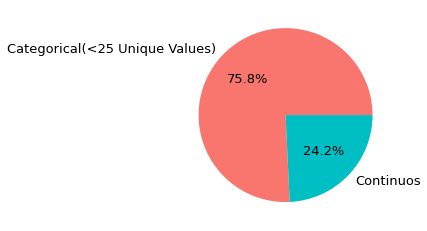

In [12]:
df = pd.concat([train[FEATURES], test[FEATURES]], axis=0)

cat_features = [col for col in FEATURES if df[col].nunique() < 25]
cont_features = [col for col in FEATURES if df[col].nunique() >= 25]

del df
print(f'Total number of features: {len(FEATURES)}')
print(f'\033[92mNumber of categorical (<25 Unique Values) features: {len(cat_features)}')
print(f'\033[96mNumber of continuos features: {len(cont_features)}')


plt.pie([len(cat_features), len(cont_features)], 
        labels=['Categorical(<25 Unique Values)', 'Continuos'],
        colors=['#F8766D', '#00BFC4'],
        textprops={'fontsize': 13},
        autopct='%1.1f%%')
plt.show()

<a id="4.3"></a>
## Feature Distribution of Continous Features

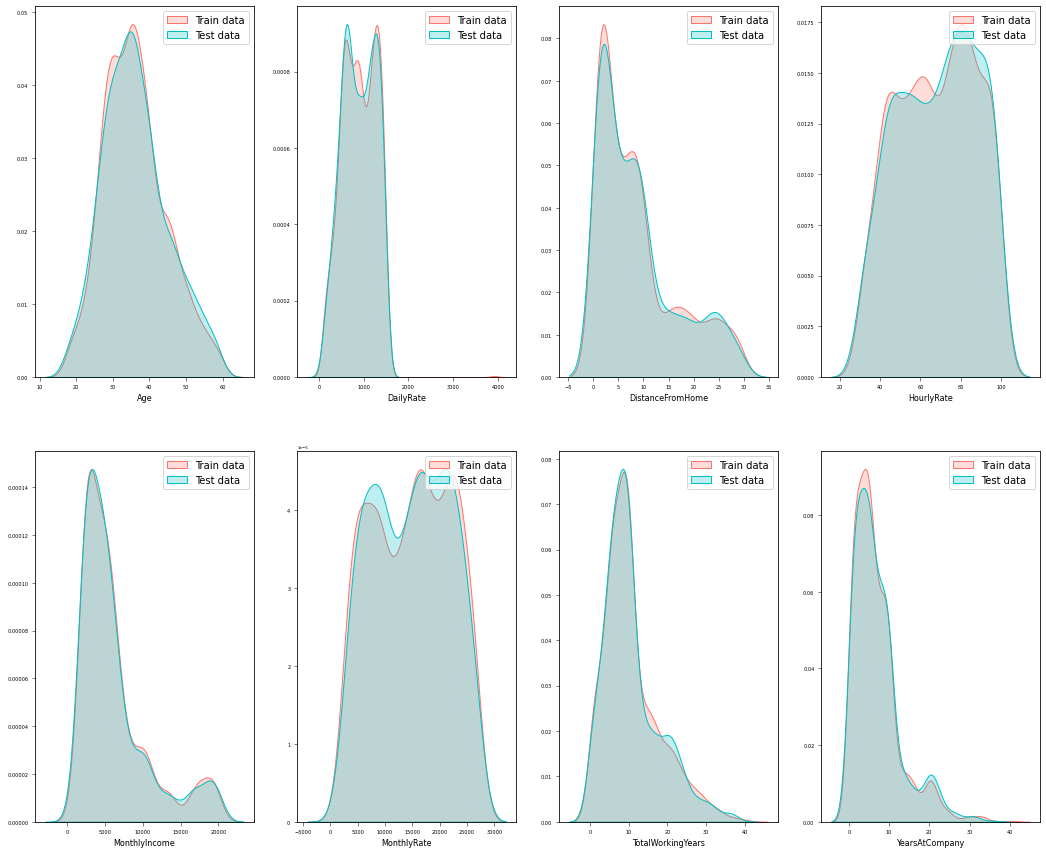

In [13]:
ncols = 4
nrows = 2

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 15))

for r in range(nrows):
    for c in range(ncols):
        col = cont_features[r*ncols+c]
        sns.kdeplot(x=train[col], ax=axes[r, c], color='#F8766D', label='Train data' , fill =True )
        sns.kdeplot(x=test[col], ax=axes[r, c], color='#00BFC4', label='Test data', fill =True)
        axes[r,c].legend()
        axes[r, c].set_ylabel('')
        axes[r, c].set_xlabel(col, fontsize=8)
        axes[r, c].tick_params(labelsize=5, width=0.5)
        axes[r, c].xaxis.offsetText.set_fontsize(6)
        axes[r, c].yaxis.offsetText.set_fontsize(4)
plt.show()

<a id="4.4"></a>
## Feature Distribution of Categorical Features

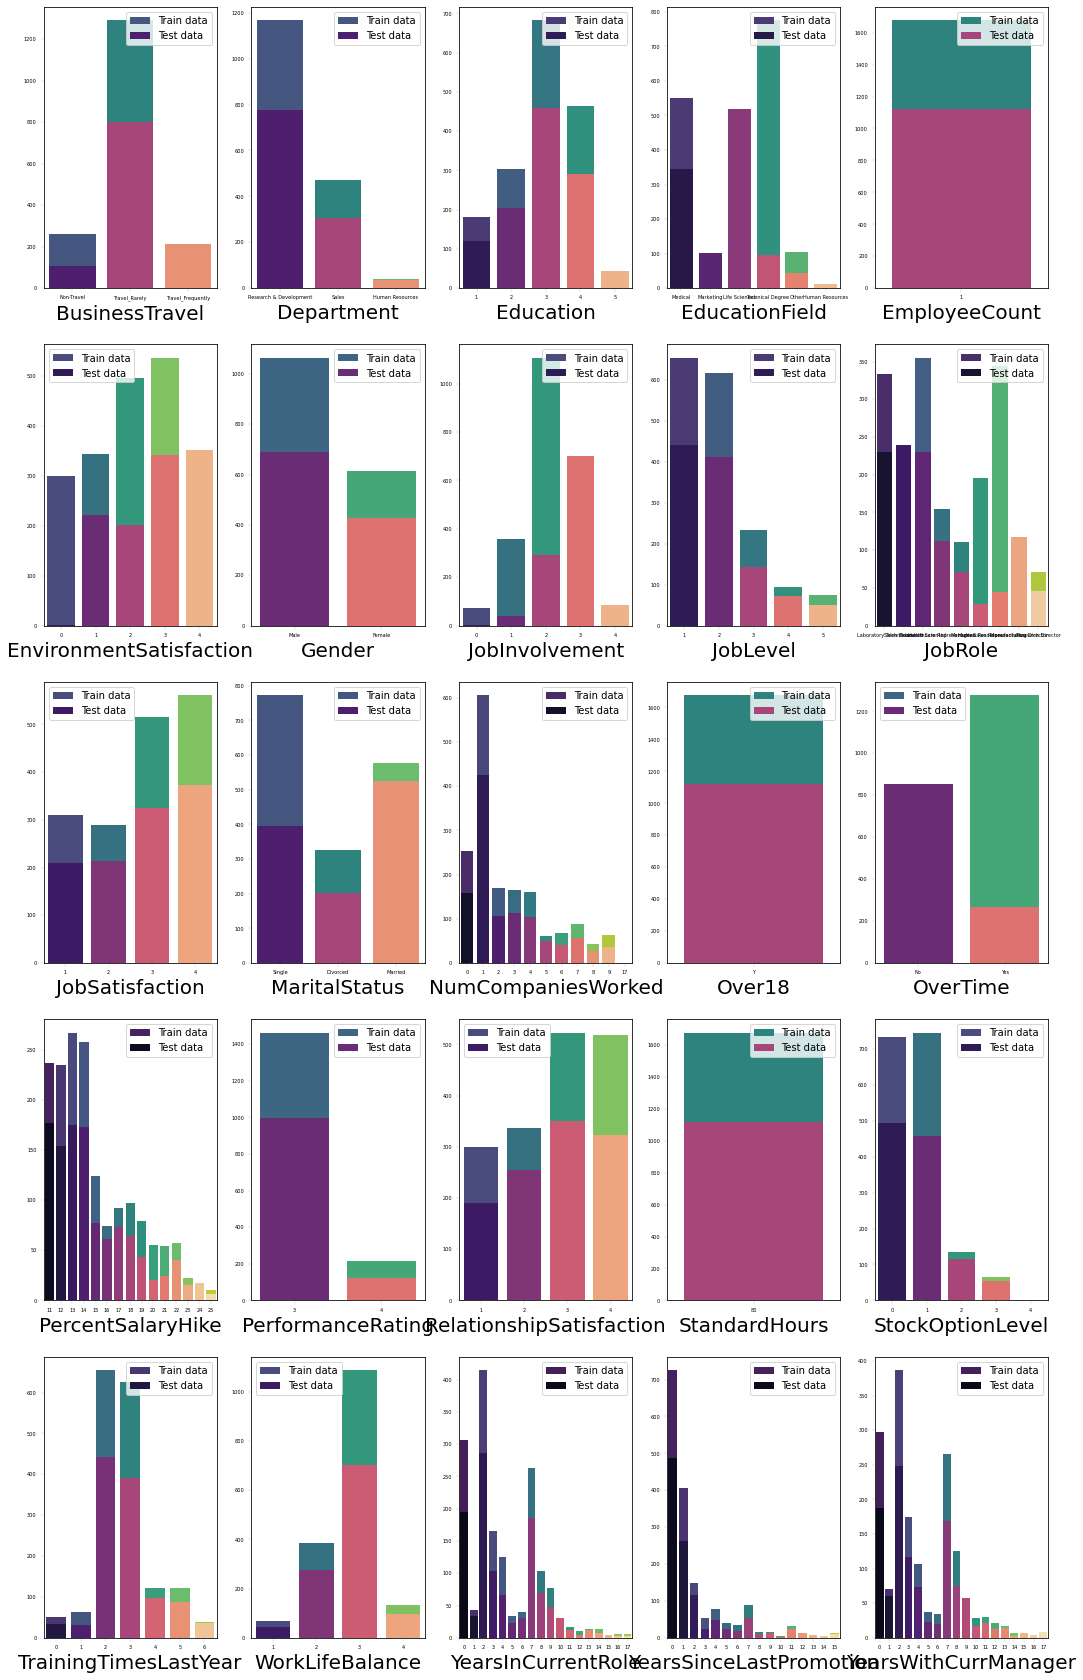

In [14]:
ncols = 5
nrows = 5

fig, axes = plt.subplots(nrows, ncols, figsize=(18, 30))
for r in range(nrows):
    for c in range(ncols):
        col = cat_features[r*ncols+c]
        sns.countplot(train[col], ax=axes[r, c],palette = "viridis", label='Train data')
        sns.countplot(test[col], ax=axes[r, c], palette = "magma", label='Test data')
        axes[r,c].legend()
        axes[r,c].set_ylabel('')
        axes[r,c].set_xlabel(col, fontsize=20)
        axes[r,c].tick_params(labelsize=5, width=0.1)
        axes[r,c].xaxis.offsetText.set_fontsize(2)
        axes[r,c].yaxis.offsetText.set_fontsize(4)
plt.show()

<a id="4.5"></a>
## Target Distribution

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Target Distribution :</u></b><br>

* <i>There are <b><u>10</u></b> different target values</i><br>
* <i>All target values are equally distributed approx - <b><u>10%</u></b> of total observations for each target.</i><br>
    
</div>

In [15]:
target_df = pd.DataFrame(train[TARGET].value_counts()).reset_index()
target_df.columns = [TARGET, 'count']
fig = px.bar(data_frame =target_df, 
             x = TARGET,
             y = 'count' , 
             color = "count",
             color_continuous_scale="Emrld") 
fig.update_layout(template = "plotly_white")
for idx,target in enumerate(target_df[TARGET]):
    print("\033[94mPercentage of " + str(target) + " category  : {:.2f} %".format(target_df["count"][idx] *100 / train.shape[0]))
fig.show()

Percentage of 0 category  : 88.07 %
Percentage of 1 category  : 11.93 %


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="5"></a>
#  Data Cleaning and Processing 

In [16]:
DROP_FEATURES = ["EmployeeCount", "Over18", "StandardHours"]
FEATURES.remove(DROP_FEATURES[0])
FEATURES.remove(DROP_FEATURES[1])
FEATURES.remove(DROP_FEATURES[2])

train = train.drop(columns = DROP_FEATURES)
test = test.drop(columns = DROP_FEATURES)

ord_encoder = OrdinalEncoder()
cat_features = [col for col in train.columns if train[col].nunique() <= 25 and col != TARGET]
train[cat_features] = pd.DataFrame(ord_encoder.fit_transform(train[cat_features]), columns  = cat_features)
test[cat_features] = pd.DataFrame(ord_encoder.fit_transform(test[cat_features]), columns  = cat_features)

encoder = LabelEncoder()
train[TARGET] = encoder.fit_transform(train[TARGET])

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
#  Modelling

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;<b><u>Observations in Target Modelling :</u></b><br>
    
* <i> <u><b>LGBMClassifier</u></b> , <u><b>CatBoostClassifier</u></b> and <u><b>XGBClassifier</u></b> used in modelling on 5-fold validation.</i><br>
* <i> Further Hyperparameter tuning can imporve the results.</i><br>
    
</div>

<a id="6.1"></a>
## LGBM Classifier

In [17]:
lgb_params = {
    'objective' : 'binary',
    'metric' : 'auc',
    'n_estimators' : 100,
    "learning_rate" : 0.256,
}


lgb_predictions = 0
lgb_scores = []
lgb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = LGBMClassifier(**lgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  preds_valid)
    lgb_scores.append(auc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, AUC score: {auc:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    lgb_fimp.append(fim)
    test_preds = model.predict_proba(test[FEATURES])[:, 1]
    lgb_predictions += test_preds/FOLDS
    
print("Mean AUC :", np.mean(lgb_scores))

========== Fold=1 ==========
Fold=1, AUC score: 0.81, Run Time: 0.27s
========== Fold=2 ==========
Fold=2, AUC score: 0.82, Run Time: 0.21s
========== Fold=3 ==========
Fold=3, AUC score: 0.83, Run Time: 0.21s
========== Fold=4 ==========
Fold=4, AUC score: 0.79, Run Time: 0.20s
========== Fold=5 ==========
Fold=5, AUC score: 0.77, Run Time: 0.20s
Mean AUC : 0.8058047984425102


### Feature Importance for LGBM Classifier (Top 15 Features)

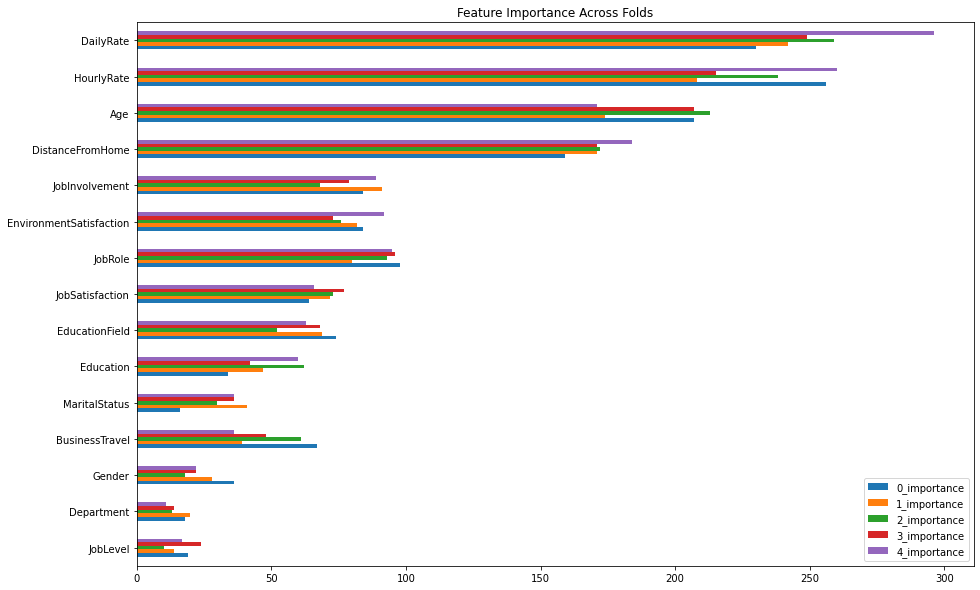

In [18]:
lgbm_fis_df = pd.concat(lgb_fimp, axis=1).head(15)
lgbm_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="6.2"></a>
## Catboost Classifier

In [19]:
catb_params = {
    "objective": "Logloss",
    "iterations": 5000,
    "eval_metric": "AUC",
    "random_seed": 12
    
}


catb_predictions = 0
catb_scores = []
catb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = CatBoostClassifier(**catb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  preds_valid)
    catb_scores.append(auc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, AUC score: {auc:.2f}, Run Time: {run_time:.2f}s")
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    catb_fimp.append(fim)
    test_preds = model.predict_proba(test[FEATURES])[:, 1]
    catb_predictions += test_preds/FOLDS
    
print("Mean AUC :", np.mean(catb_scores))

========== Fold=1 ==========
Fold=1, AUC score: 0.82, Run Time: 12.14s
========== Fold=2 ==========
Fold=2, AUC score: 0.83, Run Time: 12.45s
========== Fold=3 ==========
Fold=3, AUC score: 0.87, Run Time: 12.17s
========== Fold=4 ==========
Fold=4, AUC score: 0.85, Run Time: 11.96s
========== Fold=5 ==========
Fold=5, AUC score: 0.81, Run Time: 12.16s
Mean AUC : 0.8352203389830507


### Feature Importance for Catboost Classifier (Top 15 Features)

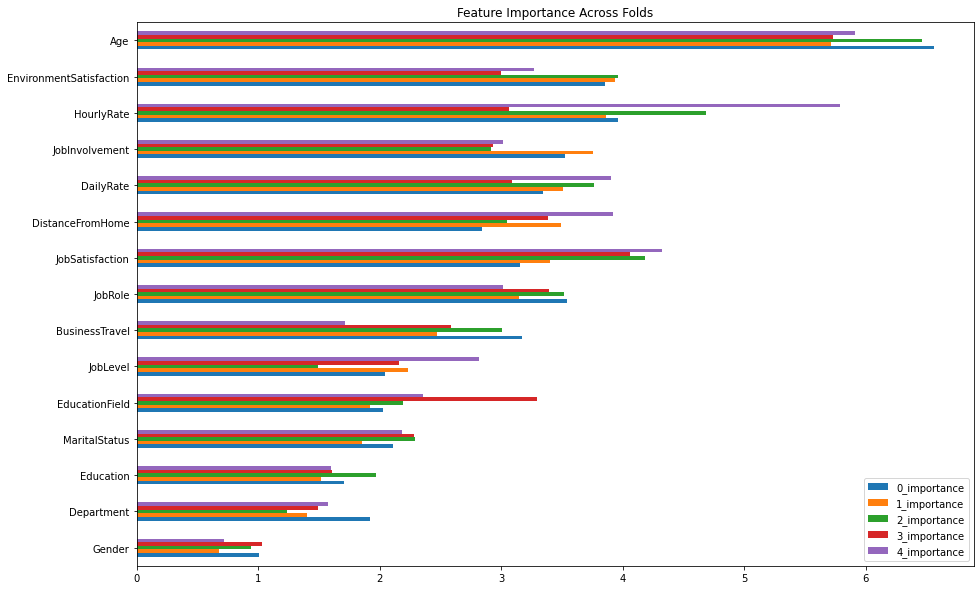

In [20]:
catb_fis_df = pd.concat(catb_fimp, axis=1).head(15)
catb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a id="6.3"></a>
## XGBoost Classifier

In [21]:
xgb_params = {
    "objective":"binary:logistic",
    "eval_metric": "auc",
    "n_estimators": 500
}


xgb_predictions = 0
xgb_scores = []
xgb_fimp = []

skf = StratifiedKFold(n_splits=FOLDS, shuffle=True, random_state=RANDOM_STATE)
for fold, (train_idx, valid_idx) in enumerate(skf.split(train[FEATURES], train[TARGET])):
    
    print(10*"=", f"Fold={fold+1}", 10*"=")
    start_time = time.time()
    
    X_train, X_valid = train.iloc[train_idx][FEATURES], train.iloc[valid_idx][FEATURES]
    y_train , y_valid = train[TARGET].iloc[train_idx] , train[TARGET].iloc[valid_idx]
    
    model = XGBClassifier(**xgb_params)
    model.fit(X_train, y_train,verbose=0)
    
    preds_valid = model.predict_proba(X_valid)[:, 1]
    auc = roc_auc_score(y_valid,  preds_valid)
    xgb_scores.append(auc)
    run_time = time.time() - start_time
    
    print(f"Fold={fold+1}, AUC score: {auc:.2f}, Run Time: {run_time:.2f}s")
    test_preds = model.predict_proba(test[FEATURES])[:, 1]
    fim = pd.DataFrame(index=FEATURES,
                 data=model.feature_importances_,
                 columns=[f'{fold}_importance'])
    xgb_fimp.append(fim)
    xgb_predictions += test_preds/FOLDS
    
print("Mean AUC :", np.mean(xgb_scores))

========== Fold=1 ==========
Fold=1, AUC score: 0.80, Run Time: 1.98s
========== Fold=2 ==========
Fold=2, AUC score: 0.81, Run Time: 1.82s
========== Fold=3 ==========
Fold=3, AUC score: 0.82, Run Time: 2.73s
========== Fold=4 ==========
Fold=4, AUC score: 0.81, Run Time: 1.80s
========== Fold=5 ==========
Fold=5, AUC score: 0.78, Run Time: 1.79s
Mean AUC : 0.8042489120476409


### Feature Importance for XGBoost Classifier (Top 15 Features)

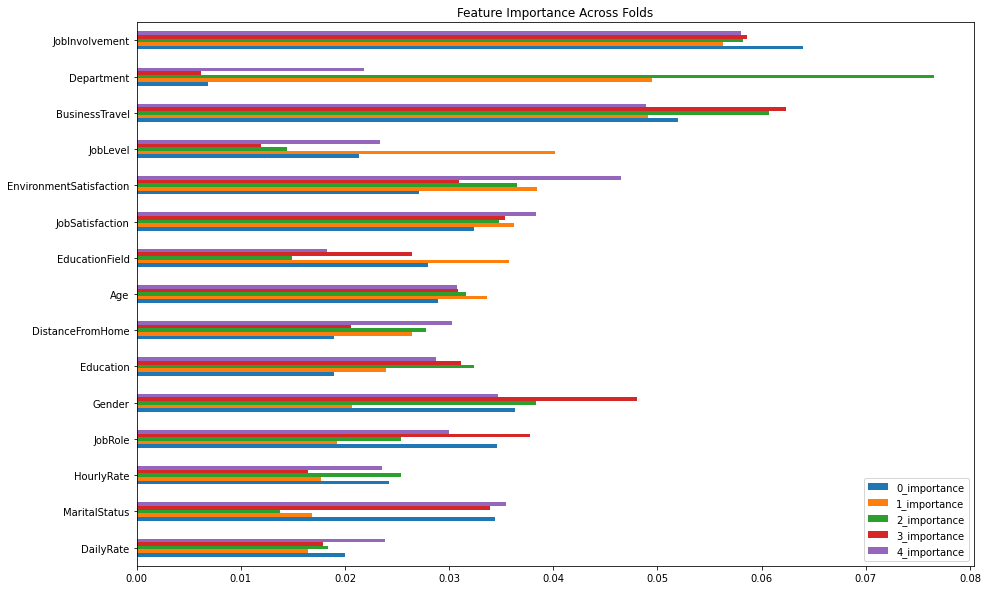

In [22]:
xgb_fis_df = pd.concat(xgb_fimp, axis=1).head(15)
xgb_fis_df.sort_values('1_importance').plot(kind='barh', figsize=(15, 10),
                                       title='Feature Importance Across Folds')
plt.show()

<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<a id="6"></a>
#  Submission

### LGBM Classifier Submission

In [23]:
lgb_submission = submission.copy()
lgb_submission[TARGET] = lgb_predictions
lgb_submission.to_csv("lgb-subs.csv",index=False)
lgb_submission.head()

,id,Attrition
0,1677,0.002125
1,1678,0.000002
2,1679,0.000004
3,1680,0.000001
4,1681,0.239666


### Catboost Classifier Submission

In [24]:
catb_submission = submission.copy()
catb_submission[TARGET] = catb_predictions
catb_submission.to_csv("catb-subs.csv",index=False)
catb_submission.to_csv("submissions.csv",index=False)
catb_submission.head()

,id,Attrition
0,1677,0.123925
1,1678,0.021546
2,1679,0.015909
3,1680,0.020739
4,1681,0.401831


### XGboost Classifier Submission

In [25]:
xgb_submission = submission.copy()
xgb_submission[TARGET] = xgb_predictions
xgb_submission.to_csv("xgb-subs.csv",index=False)
xgb_submission.head()

,id,Attrition
0,1677,0.074501
1,1678,0.000023
2,1679,0.000720
3,1680,0.000049
4,1681,0.548780


<a href="#toc" role="button" aria-pressed="true" >⬆️Back to Table of Contents ⬆️</a>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    
    
### <center>Thank you for reading🙂</center>
### <center>If you have any feedback or find anything wrong, please let me know!</center>
